In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

## Step 1: analysis of PCs (no metadata)

In [2]:
evals = pd.read_csv('../pca/results/ukb_pca_plink2.eigenval',delim_whitespace=True,header=None)
evecs = pd.read_csv('../pca/results/ukb_pca_plink2.eigenvec',delim_whitespace=True)

In [40]:
evecs

,#FID,IID,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,...,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20
0,1000019,1000019,0.000366,-0.000138,-0.000086,0.000020,-0.000218,-0.000102,-0.001115,0.000173,...,0.002002,0.000860,-0.000446,-0.001169,0.000036,0.000398,7.538630e-04,0.000054,0.001195,-0.002128
1,1000022,1000022,0.000310,-0.000171,-0.000170,0.000244,0.000604,0.000074,-0.000463,-0.000226,...,-0.001248,-0.000207,-0.001433,-0.003421,0.000157,0.000814,-5.070080e-04,0.002993,-0.000881,0.000674
2,1000035,1000035,0.000336,-0.000336,0.000294,-0.000292,0.000804,-0.000085,-0.000142,-0.000615,...,-0.000987,-0.000368,-0.000004,0.001169,-0.000876,0.001806,1.688150e-03,0.001824,-0.001963,-0.000106
3,1000046,1000046,0.000323,-0.000203,0.000192,-0.000076,0.001231,0.000659,0.000348,0.000555,...,-0.000169,-0.000411,0.000198,-0.001488,-0.000667,0.000183,1.996310e-03,-0.000712,-0.000088,-0.000975
4,1000054,1000054,0.000318,-0.000144,0.000147,-0.000329,0.001258,0.000314,0.000140,-0.000188,...,-0.000252,0.000927,0.000397,0.001430,0.002086,0.000013,1.389810e-04,-0.000503,-0.001387,0.000680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407007,6023660,6023660,0.000297,-0.000093,-0.000099,-0.000103,0.000407,-0.000191,-0.000150,0.000336,...,0.001039,-0.001251,-0.000963,-0.001780,-0.000903,0.001799,8.390650e-07,-0.001560,0.000294,0.003130
407008,6023674,6023674,0.000391,-0.000233,0.000074,0.000304,0.001109,-0.000090,0.000328,0.000155,...,-0.001725,0.000237,0.000268,-0.000874,-0.000500,0.000597,-1.652070e-03,-0.001230,0.000143,-0.000016
407009,6023683,6023683,0.000311,-0.000164,0.000443,0.000263,0.001557,0.000149,-0.000192,-0.000871,...,0.000559,0.000388,-0.000287,-0.001832,0.001921,-0.000120,4.398290e-04,-0.000808,0.001239,0.000429
407010,6023701,6023701,0.000312,-0.000272,0.000174,0.000114,0.001300,0.001132,0.000636,-0.000155,...,-0.001320,-0.000446,-0.000144,0.000522,-0.000704,-0.000590,1.270170e-03,0.002609,-0.001417,-0.000891


### Biplots of PCs 1-20

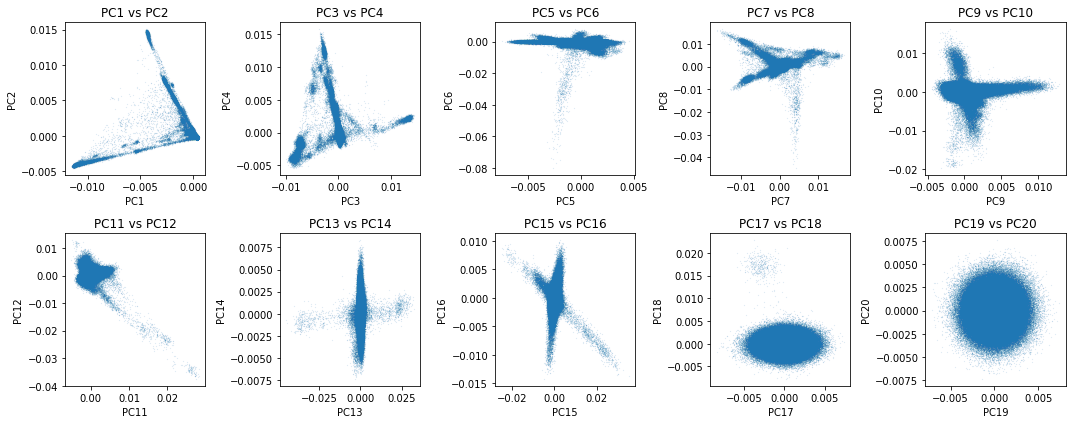

In [11]:
num_pcs = 20
fig, axes = plt.subplots(nrows=2,ncols=5,figsize=(15,6))
axes = axes.flatten()
for i in range(0, num_pcs, 2):
    pc1_col = f'PC{i+1}'
    pc2_col = f'PC{i+2}'
    axes[i // 2].scatter(evecs[pc1_col], evecs[pc2_col], s=0.01, alpha=0.5)
    axes[i // 2].set_title(f'{pc1_col} vs {pc2_col}')
    axes[i // 2].set_xlabel(pc1_col)
    axes[i // 2].set_ylabel(pc2_col)
plt.tight_layout()
plt.show()

### Eigenvalues and standard deviation

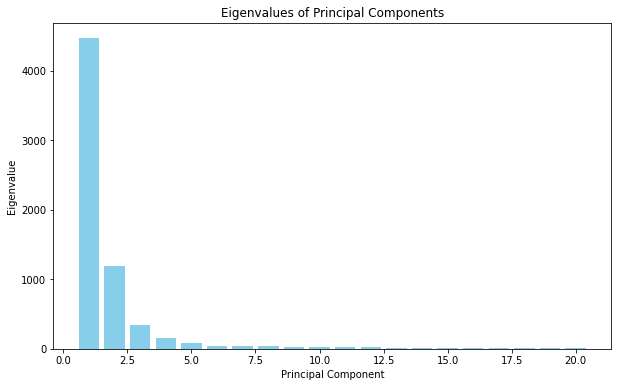

In [12]:
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(evals) + 1), evals[0], color='skyblue')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.title('Eigenvalues of Principal Components')
plt.show()

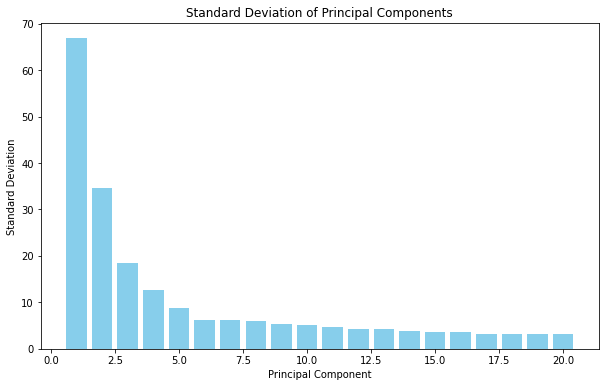

In [13]:
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(evals) + 1), [np.sqrt(e) for e in evals[0]], color='skyblue')
plt.xlabel('Principal Component')
plt.ylabel('Standard Deviation')
plt.title('Standard Deviation of Principal Components')
plt.show()

## Step 2: Load in metadata and create dataframe

In [35]:
meta = pd.read_csv('../metadata/participant_metadata.csv')
wes_ids = pd.read_csv('../metadata/wes_ids.txt',delim_whitespace=True,header=None)
wgs_ids = pd.read_csv('../metadata/wes_ids.txt',delim_whitespace=True,header=None)

In [36]:
meta

,participant.eid,participant.p54_i0,participant.p21000_i0,participant.p1647_i0,participant.p20115_i0,participant.p130_i0,participant.p129_i0
0,1000224,11014,1001.0,1.0,NaN,435500.0,387500.0
1,1000272,11021,1001.0,1.0,NaN,409500.0,287500.0
2,1000477,11014,1001.0,1.0,NaN,457500.0,402500.0
3,1000482,11016,-3.0,1.0,NaN,337500.0,391500.0
4,1000568,11008,1001.0,1.0,NaN,369500.0,422500.0
...,...,...,...,...,...,...,...
502363,6023516,11007,1001.0,1.0,NaN,459500.0,451500.0
502364,6023584,11013,1001.0,1.0,NaN,456500.0,341500.0
502365,6023595,11011,1001.0,2.0,NaN,286500.0,378500.0
502366,6023625,11017,1001.0,1.0,NaN,444500.0,541500.0


In [37]:
# format metadata

meta = meta.rename(columns={'participant.eid':'id'})

# undo codings
meta['participant.p54_i0'] = meta['participant.p54_i0'].astype(str)
center_coding = pd.read_csv("codings/coding10.tsv",delimiter="\t",names=["participant.p54_i0","assessment_center"],header=0)
center_dict = dict(zip(center_coding['participant.p54_i0'].astype(str),center_coding['assessment_center']))
meta['assessment_center'] = meta['participant.p54_i0'].map(center_dict)
meta = meta.drop('participant.p54_i0',axis=1)

meta['participant.p21000_i0'] = meta['participant.p21000_i0'].astype(str)
meta['participant.p21000_i0'] = meta['participant.p21000_i0'].str.replace(r'\.0$', '',regex=True)
ethnicity_coding = pd.read_csv("codings/coding1001.tsv",delimiter="\t",usecols=[0,1],names=["participant.p21000_i0","ethnic_background"],header=0)
ethnicity_dict = dict(zip(ethnicity_coding['participant.p21000_i0'].astype(str),ethnicity_coding['ethnic_background']))
meta['ethnic_background'] = meta['participant.p21000_i0'].map(ethnicity_dict)
meta = meta.drop('participant.p21000_i0',axis=1)

meta['participant.p1647_i0'] = meta['participant.p1647_i0'].astype(str)
meta['participant.p1647_i0'] = meta['participant.p1647_i0'].str.replace(r'\.0$', '',regex=True)
birth_UKelsewhere_coding = pd.read_csv("codings/coding100420.tsv",delimiter="\t",usecols=[0,1],names=["participant.p1647_i0","birth_UKelsewhere"],header=0)
birth_UKelsewhere_dict = dict(zip(birth_UKelsewhere_coding['participant.p1647_i0'].astype(str),birth_UKelsewhere_coding['birth_UKelsewhere']))
meta['birth_UKelsewhere'] = meta['participant.p1647_i0'].map(birth_UKelsewhere_dict)
meta = meta.drop('participant.p1647_i0',axis=1)

meta['participant.p20115_i0'] = meta['participant.p20115_i0'].astype(str)
meta['participant.p20115_i0'] = meta['participant.p20115_i0'].str.replace(r'\.0$', '',regex=True)
birth_nonUK_coding = pd.read_csv("codings/coding89.tsv",delimiter="\t",usecols=[0,1],names=["participant.p20115_i0","birth_nonUK"],header=0)
birth_nonUK_dict = dict(zip(birth_nonUK_coding['participant.p20115_i0'].astype(str),birth_nonUK_coding['birth_nonUK']))
meta['birth_nonUK'] = meta['participant.p20115_i0'].map(birth_nonUK_dict)
meta = meta.drop('participant.p20115_i0',axis=1)

# in coordinates, replace -1 with NA
meta = meta.rename(columns={'participant.p130_i0':'birth_east_coord','participant.p129_i0':'birth_north_coord'})
meta.loc[meta['birth_east_coord'] == -1, 'birth_east_coord'] = pd.NA
meta.loc[meta['birth_north_coord'] == -1, 'birth_north_coord'] = pd.NA


In [38]:
meta

,id,birth_east_coord,birth_north_coord,assessment_center,ethnic_background,birth_UKelsewhere,birth_nonUK
0,1000224,435500.0,387500.0,Sheffield,British,England,NaN
1,1000272,409500.0,287500.0,Birmingham,British,England,NaN
2,1000477,457500.0,402500.0,Sheffield,British,England,NaN
3,1000482,337500.0,391500.0,Liverpool,Prefer not to answer,England,NaN
4,1000568,369500.0,422500.0,Bury,British,England,NaN
...,...,...,...,...,...,...,...
502363,6023516,459500.0,451500.0,Reading,British,England,NaN
502364,6023584,456500.0,341500.0,Nottingham,British,England,NaN
502365,6023595,286500.0,378500.0,Bristol,British,Wales,NaN
502366,6023625,444500.0,541500.0,Middlesborough,British,England,NaN


### Add in PCs

In [45]:
evecs = evecs.rename(columns={'IID':'id'})
meta_pcs = pd.merge(meta,evecs.iloc[:,1:],on='id',how='left')

In [46]:
meta_pcs.to_csv('')

,id,birth_east_coord,birth_north_coord,assessment_center,ethnic_background,birth_UKelsewhere,birth_nonUK,PC1,PC2,PC3,...,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20
0,1000224,435500.0,387500.0,Sheffield,British,England,NaN,0.000420,-0.000268,0.000011,...,-0.000211,0.000425,-0.000449,0.000303,-0.000101,0.000278,8.811130e-04,-0.000551,0.001980,0.001688
1,1000272,409500.0,287500.0,Birmingham,British,England,NaN,0.000363,-0.000177,0.000192,...,0.001564,-0.000006,0.001583,-0.003312,-0.000932,-0.000258,-2.018220e-03,-0.000027,-0.000205,0.000512
2,1000477,457500.0,402500.0,Sheffield,British,England,NaN,0.000341,-0.000285,0.000181,...,-0.000342,0.000953,-0.000014,0.000393,0.000768,-0.001236,6.971460e-05,-0.001342,0.001745,-0.001456
3,1000482,337500.0,391500.0,Liverpool,Prefer not to answer,England,NaN,-0.000078,0.000076,-0.001317,...,-0.002551,0.005465,0.002109,0.000305,0.004479,0.000192,3.548300e-07,-0.000078,0.000748,0.000139
4,1000568,369500.0,422500.0,Bury,British,England,NaN,0.000401,-0.000159,0.000173,...,0.002823,0.000502,-0.000131,0.000828,-0.000839,-0.000026,-2.316330e-03,-0.001559,0.001105,0.000632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502363,6023516,459500.0,451500.0,Reading,British,England,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
502364,6023584,456500.0,341500.0,Nottingham,British,England,NaN,0.000330,-0.000124,0.000196,...,-0.000486,0.001561,-0.000064,-0.000497,-0.000448,-0.002081,-7.891410e-04,0.000415,0.002270,0.001084
502365,6023595,286500.0,378500.0,Bristol,British,Wales,NaN,0.000274,-0.000246,0.000293,...,-0.001378,-0.000192,0.000002,-0.001122,0.000670,-0.000620,2.083680e-04,0.001992,0.000287,-0.001136
502366,6023625,444500.0,541500.0,Middlesborough,British,England,NaN,0.000403,-0.000168,0.000131,...,0.000459,-0.000007,0.000716,-0.000524,-0.000110,0.000893,-2.673070e-03,0.001263,0.000111,0.002142


## Step 3: Descriptive plots

* PCA labeled by metadata
* Diversity (PCA) by center
* PCs by birthplace coordinates

0         11014
1         11021
2         11014
3         11016
4         11008
          ...  
502363    11007
502364    11013
502365    11011
502366    11017
502367    11018
Name: participant.p54_i0, Length: 502368, dtype: object